In [34]:
import numpy as np
from numpy import pi, cos, sin

import matplotlib.pyplot as plt

# Reloading the module
import importlib

import Nodal2D
importlib.reload(Nodal2D)
from Nodal2D import *

import Curve
importlib.reload(Curve)
from Curve import *

import MappingGeometry2D
importlib.reload(MappingGeometry2D)
from MappingGeometry2D import *

## Boundary curves

In [35]:
# Inner and outer radius
a = 1
b = 2

In [36]:
# Creating curve1
# Create a curve class
c1 = Curve2D(N=10)
# Set boundary parameter points to be Legendre Gauss Lobbato points
c1.set_parameter_points(point_type="Legendre")
c1.set_BarycentricWeights()
c1.set_DiffMatrix()

# Parameter range
par_range = np.array([-1,1])
x_start = a
y_start = 0
x_end = b
y_end = 0


def x(t):
    return (x_start * (1-t) + x_end * (1+t))/2

def y(t):
    return (y_start * (1-t) + y_end * (1+t))/2

def x_deri(t):
    return (x_end - x_start)/2

def y_deri(t):
    return (y_end - y_start)/2

c1.reparameterization(x, y, x_deri, y_deri, par_range)
c1.cal_derivatives_node()

In [37]:
# Creating curve2
# Create a curve class
c2 = Curve2D(N=20)
# Set boundary parameter points to be Legendre Gauss Lobbato points
c2.set_parameter_points(point_type="Chebyshev")
c2.set_BarycentricWeights()
c2.set_DiffMatrix()

# Parameter range
par_range = np.array([0, pi/2])



def x(t):
    return b * cos(t)

def y(t):
    return b * sin(t)

def x_deri(t):
    return - b * sin(t)

def y_deri(t):
    return b * cos(t)

c2.reparameterization(x, y, x_deri, y_deri, par_range)
c2.cal_derivatives_node()

In [38]:
# Creating curve3
# Create a curve class
c3 = Curve2D(N=10)
# Set boundary parameter points to be Legendre Gauss Lobbato points
c3.set_parameter_points(point_type="Legendre")
c3.set_BarycentricWeights()
c3.set_DiffMatrix()

# Parameter range
par_range = np.array([-1,1])
x_start = 0
y_start = a
x_end = 0
y_end = b


def x(t):
    return (x_start * (1-t) + x_end * (1+t))/2

def y(t):
    return (y_start * (1-t) + y_end * (1+t))/2

def x_deri(t):
    return (x_end - x_start)/2

def y_deri(t):
    return (y_end - y_start)/2

c3.reparameterization(x, y, x_deri, y_deri, par_range)
c3.cal_derivatives_node()

In [39]:
# Creating curve4
# Create a curve class
c4 = Curve2D(N=20)
# Set boundary parameter points to be Legendre Gauss Lobbato points
c4.set_parameter_points(point_type="Chebyshev")
c4.set_BarycentricWeights()
c4.set_DiffMatrix()

# Parameter range
par_range = np.array([0, pi/2])

def x(t):
    return a * cos(t)

def y(t):
    return a * sin(t)

def x_deri(t):
    return - a * sin(t)

def y_deri(t):
    return a * cos(t)

c4.reparameterization(x, y, x_deri, y_deri, par_range)
c4.cal_derivatives_node()

In [40]:
print(c1.parameter_points - c1.parameter_points_original)
print(c2.parameter_points - c2.parameter_points_original)
print(c3.parameter_points - c3.parameter_points_original)
print(c4.parameter_points - c4.parameter_points_original)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-1.         -0.9973579  -0.98949664 -0.9766098  -0.9590147  -0.93714458
 -0.91153796 -0.88282536 -0.85171378 -0.81896929 -0.78539816 -0.75182704
 -0.71908255 -0.68797097 -0.65925837 -0.63365175 -0.61178163 -0.59418653
 -0.58129969 -0.57343843 -0.57079633]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-1.         -0.9973579  -0.98949664 -0.9766098  -0.9590147  -0.93714458
 -0.91153796 -0.88282536 -0.85171378 -0.81896929 -0.78539816 -0.75182704
 -0.71908255 -0.68797097 -0.65925837 -0.63365175 -0.61178163 -0.59418653
 -0.58129969 -0.57343843 -0.57079633]


In [41]:
curves = [c1, c2, c3, c4]

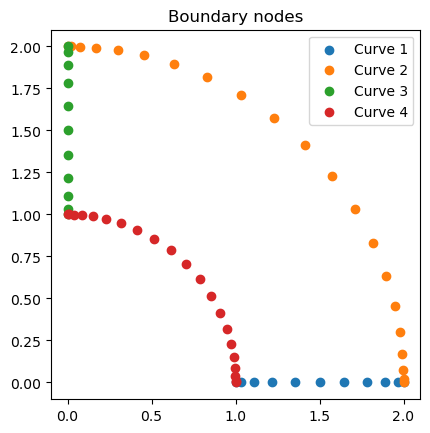

In [42]:
# Testing the geometry
fig, ax = plt.subplots(nrows=1, ncols=1)
for i, c in enumerate(curves):
    ax.scatter(c.x_nodes, c.y_nodes, label='Curve {}'.format(i+1))
ax.legend()
ax.set_title('Boundary nodes')
ax.set_aspect('equal')

## Inner nodes

In [43]:
N = 15
M = 15
nodal2D = Nodal2D(N,M)
nodal2D.cal_nodes(node_type_x="Legendre", node_type_y="Chebyshev")

## Mapping geometry class

In [44]:
mg = MappingGeometry2D(nodal2D=nodal2D, curves=curves)

In [45]:
# Testing the map
xi = np.random.rand() * 2 - 1
eta = np.random.rand() * 2 - 1
print("Physical coordinates (general)", mg.cal_Map(xi, eta))
print("Physical coordinates (quad)", mg.cal_QuadMap(xi, eta))

Physical coordinates (general) [0.53386825 1.40437852]
Physical coordinates (quad) [0.34746316 1.15496632]


In [46]:
# Testing the map derivatives
xi = np.random.rand() * 2 - 1
eta = np.random.rand() * 2 - 1
print("Metrics (general)", mg.cal_MapDerivatives(xi, eta))
print("Metrics (quad)", mg.cal_QuadMapDerivatives(xi, eta))

Metrics (general) (0.1505824008131385, 0.47678605324123996, -1.4776716066206386, 0.4666901152533418)
Metrics (quad) (0.0973754291101217, 0.4026245708898783, -0.9865168616466438, 0.9865168616466438)


In [47]:
mg.nodes_phy_x.shape

(16, 16)

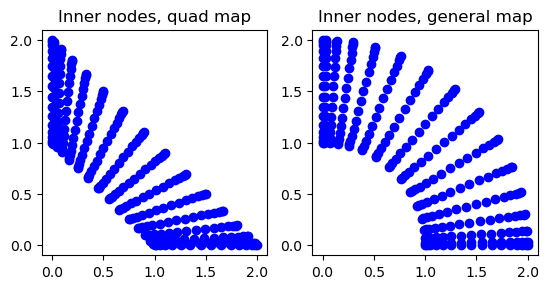

In [48]:
# Testing physical node calculation 
fig, ax = plt.subplots(nrows=1, ncols=2)
Nx = mg.nodal2D.Nx
Ny = mg.nodal2D.Ny

mg.cal_QuadMap_nodes()
for i in range(Nx+1):
    for j in range(Ny+1):
        ax[0].scatter(mg.nodes_phy_x[i,j], mg.nodes_phy_y[i,j], color='blue')
ax[0].set_title('Inner nodes, quad map')
ax[0].set_aspect('equal')

mg.cal_Map_nodes()
for i in range(Nx+1):
    for j in range(Ny+1):
        ax[1].scatter(mg.nodes_phy_x[i,j], mg.nodes_phy_y[i,j], color='blue')
ax[1].set_title('Inner nodes, general map')
ax[1].set_aspect('equal')

In [49]:
# Testing the derivative calculation
mg.cal_QuadMapDerivatives_nodes()
mg.Y_xi

array([[0.        , 0.0054631 , 0.02161364, 0.04774575, 0.08271735,
        0.125     , 0.17274575, 0.22386788, 0.27613212, 0.32725425,
        0.375     , 0.41728265, 0.45225425, 0.47838636, 0.4945369 ,
        0.5       ],
       [0.        , 0.0054631 , 0.02161364, 0.04774575, 0.08271735,
        0.125     , 0.17274575, 0.22386788, 0.27613212, 0.32725425,
        0.375     , 0.41728265, 0.45225425, 0.47838636, 0.4945369 ,
        0.5       ],
       [0.        , 0.0054631 , 0.02161364, 0.04774575, 0.08271735,
        0.125     , 0.17274575, 0.22386788, 0.27613212, 0.32725425,
        0.375     , 0.41728265, 0.45225425, 0.47838636, 0.4945369 ,
        0.5       ],
       [0.        , 0.0054631 , 0.02161364, 0.04774575, 0.08271735,
        0.125     , 0.17274575, 0.22386788, 0.27613212, 0.32725425,
        0.375     , 0.41728265, 0.45225425, 0.47838636, 0.4945369 ,
        0.5       ],
       [0.        , 0.0054631 , 0.02161364, 0.04774575, 0.08271735,
        0.125     , 0.17274575, 

In [50]:
mg.cal_MapDerivatives_nodes()
mg.Y_xi

array([[0.        , 0.008581  , 0.03392454, 0.07471793, 0.12847466,
        0.19134172, 0.25822359, 0.32336973, 0.3813555 , 0.42815953,
        0.46193977, 0.48321244, 0.49438571, 0.4988478 , 0.49992636,
        0.5       ],
       [0.        , 0.008581  , 0.03392454, 0.07471793, 0.12847466,
        0.19134172, 0.25822359, 0.32336973, 0.3813555 , 0.42815953,
        0.46193977, 0.48321244, 0.49438571, 0.4988478 , 0.49992636,
        0.5       ],
       [0.        , 0.008581  , 0.03392454, 0.07471793, 0.12847466,
        0.19134172, 0.25822359, 0.32336973, 0.3813555 , 0.42815953,
        0.46193977, 0.48321244, 0.49438571, 0.4988478 , 0.49992636,
        0.5       ],
       [0.        , 0.008581  , 0.03392454, 0.07471793, 0.12847466,
        0.19134172, 0.25822359, 0.32336973, 0.3813555 , 0.42815953,
        0.46193977, 0.48321244, 0.49438571, 0.4988478 , 0.49992636,
        0.5       ],
       [0.        , 0.008581  , 0.03392454, 0.07471793, 0.12847466,
        0.19134172, 0.25822359, 

In [51]:
mg.cal_Jacobian()
mg.J

array([[0.39269908, 0.39269908, 0.39269908, 0.39269908, 0.39269908,
        0.39269908, 0.39269908, 0.39269908, 0.39269908, 0.39269908,
        0.39269908, 0.39269908, 0.39269908, 0.39269908, 0.39269908,
        0.39269908],
       [0.39867438, 0.39867438, 0.39867438, 0.39867438, 0.39867438,
        0.39867438, 0.39867438, 0.39867438, 0.39867438, 0.39867438,
        0.39867438, 0.39867438, 0.39867438, 0.39867438, 0.39867438,
        0.39867438],
       [0.41249101, 0.41249101, 0.41249101, 0.41249101, 0.41249101,
        0.41249101, 0.41249101, 0.41249101, 0.41249101, 0.41249101,
        0.41249101, 0.41249101, 0.41249101, 0.41249101, 0.41249101,
        0.41249101],
       [0.43353816, 0.43353816, 0.43353816, 0.43353816, 0.43353816,
        0.43353816, 0.43353816, 0.43353816, 0.43353816, 0.43353816,
        0.43353816, 0.43353816, 0.43353816, 0.43353816, 0.43353816,
        0.43353816],
       [0.4609524 , 0.4609524 , 0.4609524 , 0.4609524 , 0.4609524 ,
        0.4609524 , 0.4609524 , 

In [52]:
# Testing the normal vector calculation
mg.cal_normal_vector_nodes()
print("Lower normal vectors\n", mg.norm_vect_lower)
print("Upper normal vectors\n", mg.norm_vect_upper)
print("Left normal vectors\n", mg.norm_vect_left)
print("Right normal vectors\n", mg.norm_vect_right)

Lower normal vectors
 [[-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]]
Upper normal vectors
 [[-1.000000e+00  6.123234e-17]
 [-1.000000e+00  6.123234e-17]
 [-1.000000e+00  6.123234e-17]
 [-1.000000e+00  6.123234e-17]
 [-1.000000e+00  6.123234e-17]
 [-1.000000e+00  6.123234e-17]
 [-1.000000e+00  6.123234e-17]
 [-1.000000e+00  6.123234e-17]
 [-1.000000e+00  6.123234e-17]
 [-1.000000e+00  6.123234e-17]
 [-1.000000e+00  6.123234e-17]
 [-1.000000e+00  6.123234e-17]
 [-1.000000e+00  6.123234e-17]
 [-1.000000e+00  6.123234e-17]
 [-1.000000e+00  6.123234e-17]
 [-1.000000e+00  6.123234e-17]]
Left normal vectors
 [[-1.00000000e+00  1.35703666e-14]
 [-9.99852722e-01 -1.71619917e-02]
 [-9.97695596e-01 -6.78490735e-02]
 [-9.88771421e-01 -1.49435860e-01]
 [-9.66424877e-01 -2.56949327e-01]
 [-9.23879533e-01 -3.82683432e-01]
 [-8.56319051e-01 -5.16447174e-01]
 [-7.62711009e-0

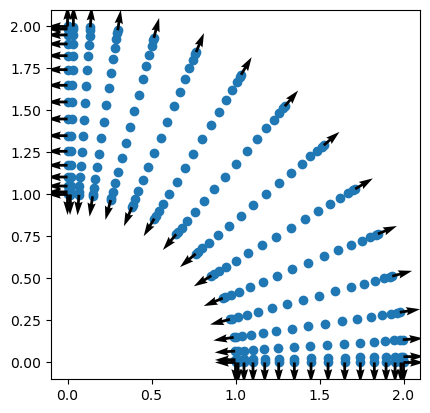

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=1)
Nx = mg.nodal2D.Nx
Ny = mg.nodal2D.Ny

ax.scatter(mg.nodes_phy_x, mg.nodes_phy_y)

j = 0
ax.quiver(mg.nodes_phy_x[:,j], mg.nodes_phy_y[:,j], 
              mg.norm_vect_lower[:,0], mg.norm_vect_lower[:,1])
    
j = Ny   
ax.quiver(mg.nodes_phy_x[:,j], mg.nodes_phy_y[:,j], 
              mg.norm_vect_upper[:,0], mg.norm_vect_upper[:,1])    

i = 0
ax.quiver(mg.nodes_phy_x[i,:], mg.nodes_phy_y[i,:], 
              mg.norm_vect_left[:,0], mg.norm_vect_left[:,1])

i = Nx
ax.quiver(mg.nodes_phy_x[i,:], mg.nodes_phy_y[i,:], 
              mg.norm_vect_right[:,0], mg.norm_vect_right[:,1])   

ax.set_aspect('equal')